In [2]:
# Load Data
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

# Load the lfw_people dataset with at least 130 images of each person’s face and resize each image to 40%
lfw_people = fetch_lfw_people(min_faces_per_person=130,resize=0.4)

C:\Users\zscho\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Analyze Data
print("Total dataset size:")
# Number of samples
n_samples, h, w = lfw_people.images.shape
print("n_samples: %d" % n_samples)
# Size of an image that is number of raw features for each sample
X = lfw_people.data
n_features = X.shape[1]
print("n_features: %d" % n_features)
# Number of classes
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 910
n_features: 1850
n_classes: 3


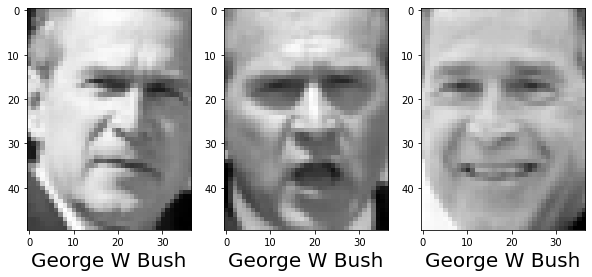

In [4]:
# Visualize Loaded Data
fig = plt.figure(figsize=(10,18))    
for i in range(1,4):
    ax = fig.add_subplot(1, 3, i)
    r = random.randint(0,len(y))
    ax.imshow(lfw_people.images[r], cmap='gray')
    ax.set_xlabel(target_names[y[r]],fontsize=20)

In [5]:
# Load Selective Data
lfw_people = fetch_lfw_people(min_faces_per_person=150,resize=0.4)
X = lfw_people.data
y = lfw_people.target

target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("n_classes: %d" % n_classes)

n_classes: 2


In [6]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state = 40)
X_train, X_test = X_train.T, X_test.T

In [7]:
# Computing Scatter Matrices
# Function to compute data matrices Xt and Xw
def getXwXt(X,y):
    Xw = X.copy()
    Xt = X.copy()
    for c in np.unique(y):
        idx = y==c
        mu_c = np.mean(X[:,idx],axis=1)[:,np.newaxis]
        Xw[:,idx]-=mu_c
    Xt -= np.mean(X,axis=1)[:,np.newaxis]
    return Xw,Xt

# Apply getXwXt on training set
Xw,Xt = getXwXt(X_train,y_train)

In [8]:
# Computing W
# Compute orthonormal basis of column space of training data
r = np.linalg.matrix_rank(Xt)
U,S,Vt = np.linalg.svd(Xt)
U = U[:,:r].copy()
# Compute the null space
A,S,Bt = np.linalg.svd(Xw.T.dot(U))
beta = Bt[-n_classes+1:,:].T
# Find intersection of column space of training data and the null space
W = U.dot(beta)

In [9]:
# Subspace Projection
X_train_p = W.T.dot(X_train)
X_test_p = W.T.dot(X_test)

In [10]:
# Evaluation on Test Set
acc = 0
y_predList = []
# For each sample in the test set predict the target and count correct predictions.
for i in range(len(y_test)):
    idx  = np.argmin(np.sum((X_train_p-X_test_p[:,i][:,np.newaxis])**2,axis=0))
    y_pred = y_train[idx]
    y_predList.append(y_pred)
    if y_pred == y_test[i]:
        acc+=1
# compute and print the accuracy
accuracy = (acc/len(y_test))
print(accuracy)

0.9025974025974026


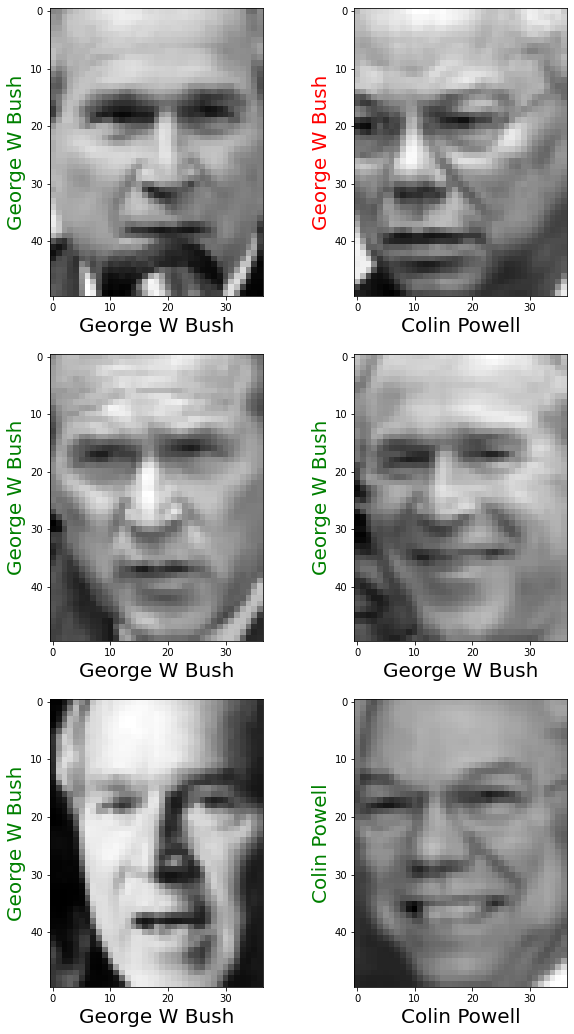

In [11]:
# Visualize Predictions
# Function to visualize the prediction for a specific test sample
def displayPrediction(ax,im,actual,prediction):
  ax.imshow(im, cmap='gray')
  ax.set_xlabel(target_names[actual],fontsize=20)
  ax.set_ylabel(target_names[prediction],fontsize=20)
  ax.yaxis.label.set_color('green')
  if prediction != actual:
    ax.yaxis.label.set_color('red')

# Display predictons for random samples from test set
fig = plt.figure(figsize=(10,18))    
for i in range(1,7):
  ax = fig.add_subplot(3, 2, i)
  r = random.randint(0,len(y_test))
  im=np.reshape(X_test.T[r],(50,37))
  displayPrediction(ax,im,y_test[r],y_predList[r])